In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings 
warnings.filterwarnings("ignore")
import os , sys

# **Dataset link:-** 
***Dataset is very large , use this link***

**https://www.kaggle.com/datasets/himanshupoddar/zomato-bangalore-restaurants**

In [2]:
#Using utils Funtion to export data from mongodb , to use this make sure to create .env file with MONGO_DB_URL and Run data_dump.py file
file_path = os.path.join(os.getcwd() , "dataset/zomato_main.csv")
df = pd.read_csv(file_path)
df

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,https://www.zomato.com/bangalore/best-brews-fo...,"Four Points by Sheraton Bengaluru, 43/3, White...",Best Brews - Four Points by Sheraton Bengaluru...,No,No,3.6 /5,27,080 40301477,Whitefield,Bar,NaN,Continental,"1,500","[('Rated 5.0', ""RATED\n Food and service are ...",[],Pubs and bars,Whitefield
51713,https://www.zomato.com/bangalore/vinod-bar-and...,"Number 10, Garudachar Palya, Mahadevapura, Whi...",Vinod Bar And Restaurant,No,No,NaN,0,+91 8197675843,Whitefield,Bar,NaN,Finger Food,600,[],[],Pubs and bars,Whitefield
51714,https://www.zomato.com/bangalore/plunge-sherat...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Plunge - Sheraton Grand Bengaluru Whitefield H...,No,No,NaN,0,NaN,Whitefield,Bar,NaN,Finger Food,"2,000",[],[],Pubs and bars,Whitefield
51715,https://www.zomato.com/bangalore/chime-sherato...,Sheraton Grand Bengaluru Whitefield Hotel & Co...,Chime - Sheraton Grand Bengaluru Whitefield Ho...,No,Yes,4.3 /5,236,080 49652769,"ITPL Main Road, Whitefield",Bar,"Cocktails, Pizza, Buttermilk",Finger Food,"2,500","[('Rated 4.0', 'RATED\n Nice and friendly pla...",[],Pubs and bars,Whitefield


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [4]:
df.isnull().sum()

url                                0
address                            0
name                               0
online_order                       0
book_table                         0
rate                            7775
votes                              0
phone                           1208
location                          21
rest_type                        227
dish_liked                     28078
cuisines                          45
approx_cost(for two people)      346
reviews_list                       0
menu_item                          0
listed_in(type)                    0
listed_in(city)                    0
dtype: int64

***By viewing this dish_liked  column has more than 20000 null values , which is more than half of total no. of entries inside dish_liked column .***

In [5]:
df.duplicated().sum()

0

# **Let Handle null values and clean dish_liked column**

In [6]:
df["dish_liked"]=df["dish_liked"].fillna(df["dish_liked"].mode()[0]) #replacing null with most occuring dish
df["dish_liked"]

0        Pasta, Lunch Buffet, Masala Papad, Paneer Laja...
1        Momos, Lunch Buffet, Chocolate Nirvana, Thai G...
2        Churros, Cannelloni, Minestrone Soup, Hot Choc...
3                                              Masala Dosa
4                                      Panipuri, Gol Gappe
                               ...                        
51712                                              Biryani
51713                                              Biryani
51714                                              Biryani
51715                         Cocktails, Pizza, Buttermilk
51716                                              Biryani
Name: dish_liked, Length: 51717, dtype: object

# **Observe Junk name**

In [7]:
df[df["name"]=="Lifetree CafÃ\x83Â\x83Ã\x82Â\x83Ã\x83Â\x82Ã\x82Â\x83Ã\x83Â\x83Ã\x82Â\x82Ã\x83Â\x82Ã\x82Â©"] #Observe junk name inside name column 
#df.iloc[20690 , 0] ="Lifetree Cafe"  #Changing junk name into a easy readable name
#df.iloc[20690 , 0]

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
6310,https://www.zomato.com/bangalore/lifetree-caf%...,"Melange Astris, 1, Langford Garden, Richmond R...",Lifetree CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,No,No,3.4/5,10,+91 7090718702,Richmond Road,Casual Dining,Biryani,"North Indian, Chinese, Continental",700,"[('Rated 4.0', 'RATED\n Good place....\nIt wa...",[],Dine-out,Brigade Road
12824,https://www.zomato.com/bangalore/lifetree-caf%...,"Melange Astris, 1, Langford Garden, Richmond R...",Lifetree CafÃÂÃÂÃÂÃÂÃÂÃÂÃÂÃÂ©,No,No,3.4/5,10,+91 7090718702,Richmond Road,Casual Dining,Biryani,"North Indian, Chinese, Continental",700,"[('Rated 4.0', 'RATED\n Good place....\nIt wa...",[],Dine-out,Church Street


In [8]:
df["dish_liked"]=df["dish_liked"].str.strip()

In [9]:
df["dish_liked"]=df["dish_liked"].str.split(", ")

In [10]:
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,[Masala Dosa],"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [11]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

# **lets drop unnecessary /irrelavents features from a dataframe**

In [12]:
features_to_drop=['url','address','phone' ,'listed_in(type)' ,'reviews_list' , "menu_item"]
df = df.drop(features_to_drop , axis=1 )
df.head(2)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","North Indian, Mughlai, Chinese",800,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","Chinese, North Indian, Thai",800,Banashankari


**Lets handle and clean features with null values**

In [13]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
dish_liked                        0
cuisines                         45
approx_cost(for two people)     346
listed_in(city)                   0
dtype: int64

`lets handle rate(rating features) which is our target column with median values.`

In [14]:
df["rate"].unique() 

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

**Lets first remove garbage VALUES  from rate column such as "/5" , which is unnecessary and also REPLACE labels like nan and NEW with NAN VALUES**

In [15]:
df["rate"]=df['rate'].str.replace("/5" , "")
df["rate"]=df['rate'].str.replace("NEW" ,"NaN")
df["rate"]=df['rate'].str.replace("nan" ,"NaN")
df["rate"]=df['rate'].str.replace("-" ,"NaN")

df["rate"].unique()

array(['4.1', '3.8', '3.7', '3.6', '4.6', '4.0', '4.2', '3.9', '3.1',
       '3.0', '3.2', '3.3', '2.8', '4.4', '4.3', 'NaN', '2.9', '3.5', nan,
       '2.6', '3.8 ', '3.4', '4.5', '2.5', '2.7', '4.7', '2.4', '2.2',
       '2.3', '3.4 ', '3.6 ', '4.8', '3.9 ', '4.2 ', '4.0 ', '4.1 ',
       '3.7 ', '3.1 ', '2.9 ', '3.3 ', '2.8 ', '3.5 ', '2.7 ', '2.5 ',
       '3.2 ', '2.6 ', '4.5 ', '4.3 ', '4.4 ', '4.9', '2.1', '2.0', '1.8',
       '4.6 ', '4.9 ', '3.0 ', '4.8 ', '2.3 ', '4.7 ', '2.4 ', '2.1 ',
       '2.2 ', '2.0 ', '1.8 '], dtype=object)

In [16]:
#Lets replace null values with average after converting rate column to float
df["rate"]=df["rate"].astype(float)
df["rate"]=df["rate"].fillna(df["rate"].median())
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

In [17]:
df["rate"].isnull().sum()

0

In [18]:
df["rest_type"].isnull().sum()

227

In [19]:
df["rest_type"].unique() #Lets replace nan values with most occuring rest_type for categorical features

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', nan, 'Dhaba',
       'Quick Bites, Sweet Shop', 'Microbrewery',
       'Food Court, Quick Bites', 'Pub, Bar', 'Casual Dining, Pub',
      

In [20]:
df["rest_type"]=df["rest_type"].fillna(df["rest_type"].mode()[0])


In [21]:
df.isnull().sum()

name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                        0
dish_liked                       0
cuisines                        45
approx_cost(for two people)    346
listed_in(city)                  0
dtype: int64

**Lets clean approx_cost(for two people) column which is continuous feature by handling null values**

In [22]:
df.rename(columns={"approx_cost(for two people)" : "approx_cost"} ,inplace=True)

In [23]:
df.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost',
       'listed_in(city)'],
      dtype='object')

In [24]:
df["approx_cost"].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', nan, '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [25]:
df["approx_cost"]=df["approx_cost"].str.replace("," , "") #Lets remove comma from each labels
df["approx_cost"]=df["approx_cost"].astype(float)
df["approx_cost"]=df['approx_cost'].fillna(df["approx_cost"].mean())
df["approx_cost"].unique()

array([ 800.        ,  300.        ,  600.        ,  700.        ,
        550.        ,  500.        ,  450.        ,  650.        ,
        400.        ,  900.        ,  200.        ,  750.        ,
        150.        ,  850.        ,  100.        , 1200.        ,
        350.        ,  250.        ,  950.        , 1000.        ,
       1500.        , 1300.        ,  199.        ,   80.        ,
       1100.        ,  160.        , 1600.        ,  230.        ,
        130.        ,   50.        ,  190.        , 1700.        ,
        555.43156645, 1400.        ,  180.        , 1350.        ,
       2200.        , 2000.        , 1800.        , 1900.        ,
        330.        , 2500.        , 2100.        , 3000.        ,
       2800.        , 3400.        ,   40.        , 1250.        ,
       3500.        , 4000.        , 2400.        , 2600.        ,
        120.        , 1450.        ,  469.        ,   70.        ,
       3200.        ,   60.        ,  560.        ,  240.     

In [26]:
df["approx_cost"]

0         800.0
1         800.0
2         800.0
3         300.0
4         600.0
          ...  
51712    1500.0
51713     600.0
51714    2000.0
51715    2500.0
51716    1500.0
Name: approx_cost, Length: 51717, dtype: float64

In [27]:
df["location"]=df["location"].fillna(df["location"].mode()[0])
df["cuisines"]=df["cuisines"].fillna(df["cuisines"].mode()[0])

In [28]:
df.isnull().sum()


name               0
online_order       0
book_table         0
rate               0
votes              0
location           0
rest_type          0
dish_liked         0
cuisines           0
approx_cost        0
listed_in(city)    0
dtype: int64

In [29]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,[Masala Dosa],"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","North Indian, Rajasthani",600.0,Banashankari


In [30]:
df_copy=df.copy()

# **EDA and Feature Engineering**

# **Lets See top Locations with higher no. of orders**

Text(0.5, 1.0, 'Top Locations with Maximum Order')

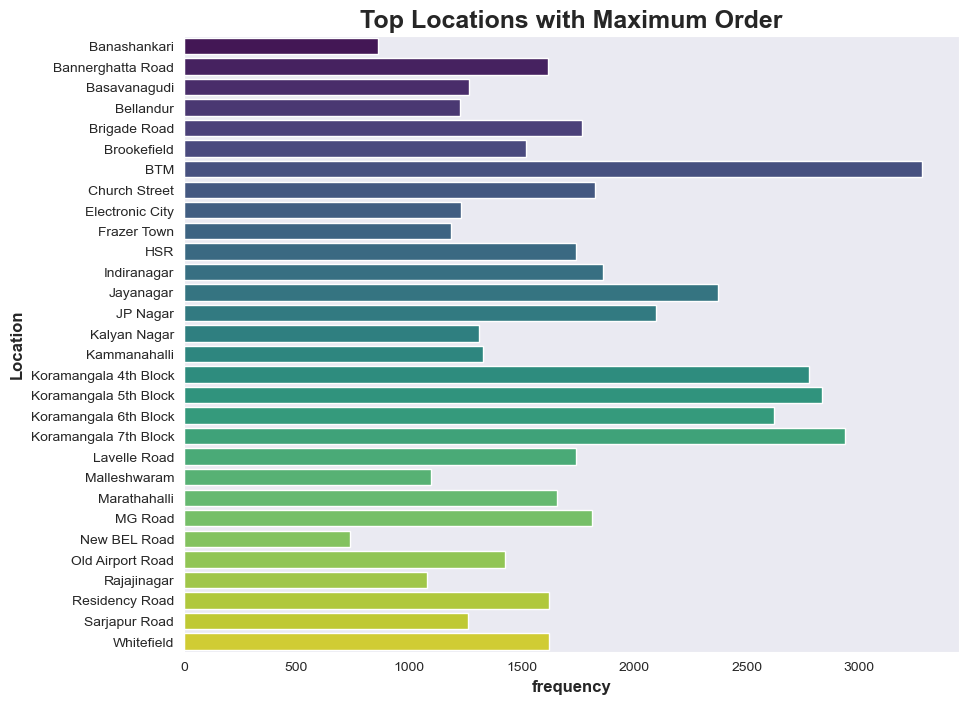

In [31]:
plt.figure(figsize=(10,8))
sns.set_style("dark")
sns.set_palette("Set2")
sns.countplot(df_copy['listed_in(city)'] ,palette="viridis")
plt.xlabel("frequency" , fontsize=12 , fontweight='bold')
plt.ylabel("Location" , fontsize=12 , fontweight='bold')
plt.title("Top Locations with Maximum Order" ,fontsize=18 , fontweight='bold')

In [32]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,[Masala Dosa],"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","North Indian, Rajasthani",600.0,Banashankari


# **Lets Observe top Restaurant type on Zomato**

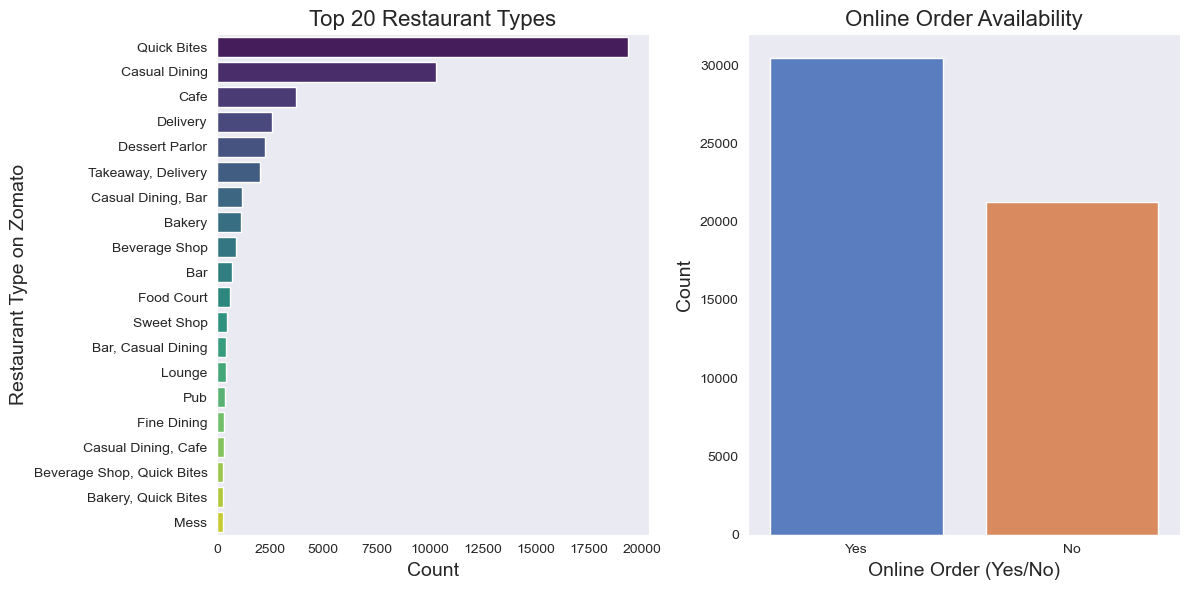

In [33]:
resrtaurant_type = df_copy["rest_type"].value_counts().sort_values(ascending=False).head(20)
online_order_available = df_copy["online_order"].value_counts()

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,6))

# Barplot for restaurant types
sns.barplot(y=resrtaurant_type.index, x=resrtaurant_type.values, ax=ax1, palette="viridis")
ax1.set_title("Top 20 Restaurant Types", fontsize=16)
ax1.set_xlabel("Count", fontsize=14)
ax1.set_ylabel("Restaurant Type on Zomato", fontsize=14)

# Barplot for online order availability
sns.barplot(x=online_order_available.index, y=online_order_available.values, ax=ax2, palette="muted")
ax2.set_title("Online Order Availability", fontsize=16)
ax2.set_xlabel("Online Order (Yes/No)", fontsize=14)
ax2.set_ylabel("Count", fontsize=14)

# Display plots
plt.tight_layout()
plt.show()

# **Lets see Top Restaurants with highest no. orders**

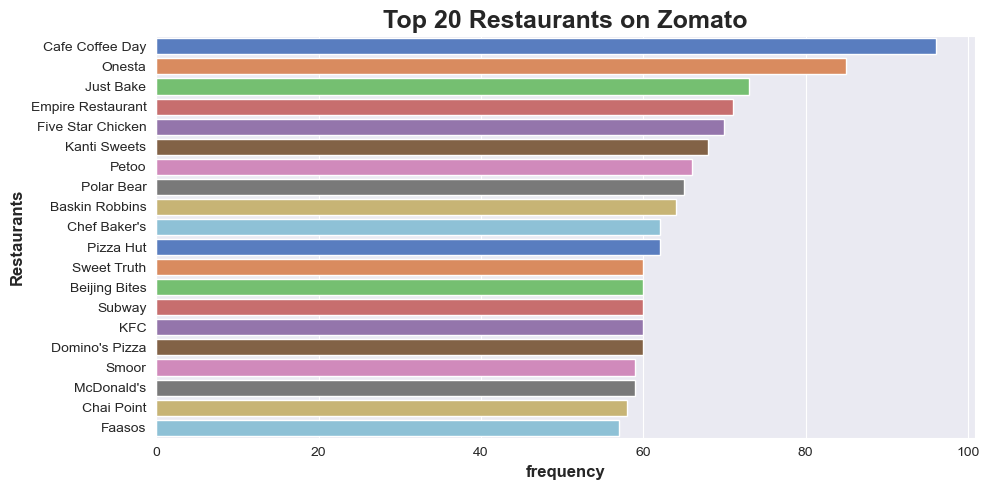

In [34]:
top_restaurants= df_copy["name"].value_counts().sort_values(ascending=False).head(20)
plt.figure(figsize=(10,5))
sns.set_style("darkgrid")
sns.set_palette("Set2")
sns.barplot(x=top_restaurants.values , y=top_restaurants.index ,palette="muted")
plt.xlabel("frequency" , fontsize=12 , fontweight='bold')
plt.ylabel("Restaurants" , fontsize=12 , fontweight='bold')
plt.title("Top 20 Restaurants on Zomato" ,fontsize=18 , fontweight='bold')
plt.tight_layout()
plt.show()


In [35]:
df_copy.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost',
       'listed_in(city)'],
      dtype='object')

# **Let's Check the Restaurants with the Most Online Orders on Zomato**

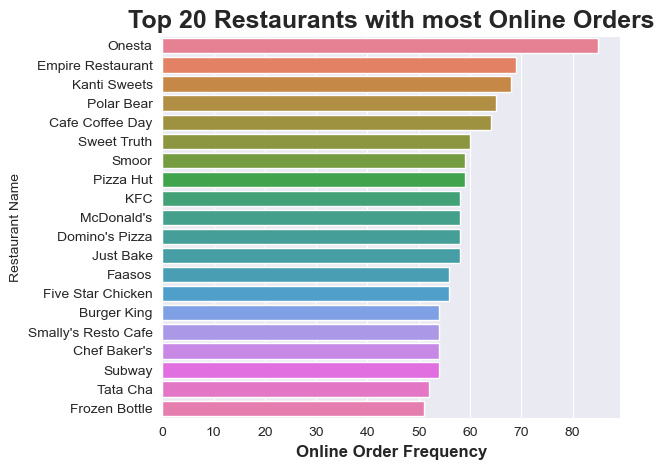

In [36]:
online_restro=df_copy[df_copy['online_order']=="Yes"]
online_order_by_restaurant=online_restro.groupby("name")['online_order'].count().sort_values(ascending=False).reset_index().head(20)
online_order_by_restaurant.columns = ["Restaurant Name", "Online Orders"]
sns.barplot(x=online_order_by_restaurant["Online Orders"] , y=online_order_by_restaurant["Restaurant Name"] , palette="husl")
plt.xlabel("Restaurants" , fontsize=12 , fontweight='bold')
plt.xlabel("Online Order Frequency" , fontsize=12 , fontweight='bold')
plt.title("Top 20 Restaurants with most Online Orders" ,fontsize=18 , fontweight='bold')
plt.tight_layout()
plt.show()

# **Lets see  Common/Average rating**

In [37]:
df["rate"].unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

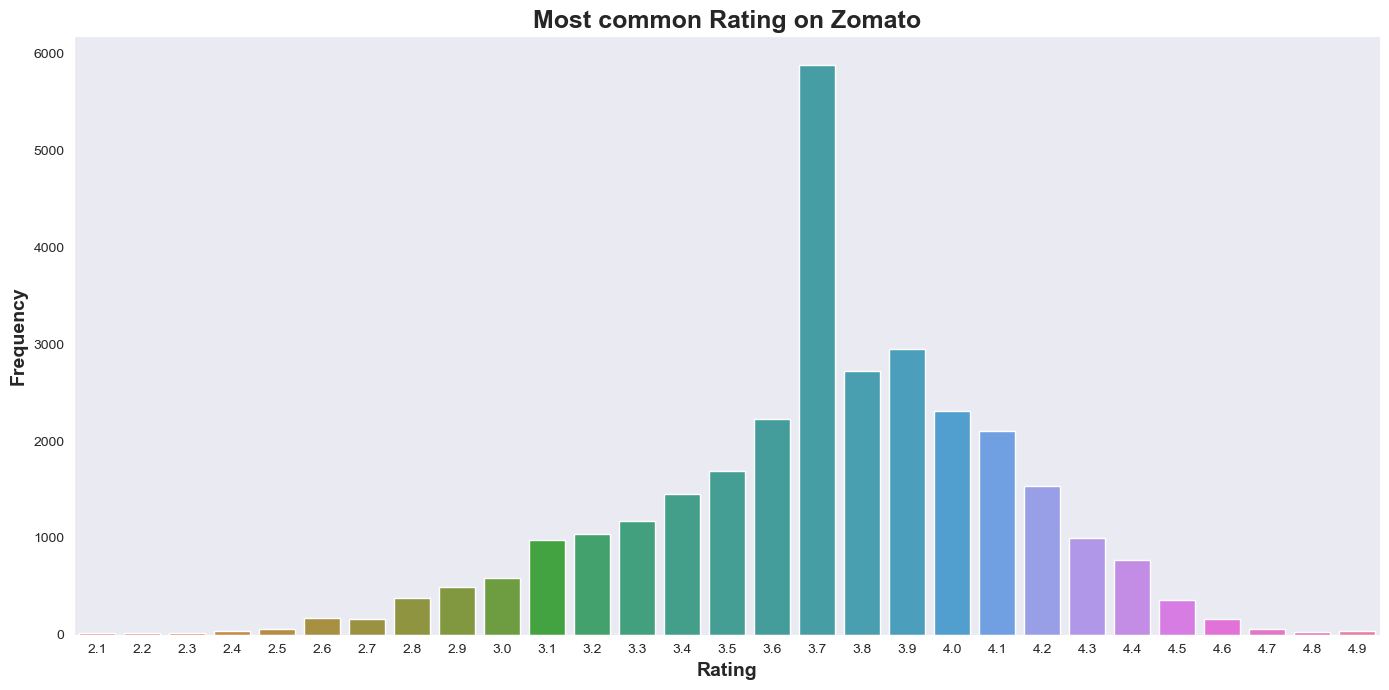

In [38]:
online_restro=df_copy[df_copy['online_order']=="Yes"]
common_rating=online_restro["rate"].value_counts().reset_index()
plt.figure(figsize=(14,7))
sns.set_style("dark")
sns.barplot(data=common_rating , x='rate' , y="count" , palette="husl")
plt.xlabel("Rating" , fontsize=14, fontweight="bold")
plt.ylabel("Frequency" ,fontsize=14 , fontweight="bold")
plt.title("Most common Rating on Zomato" , fontsize=18 , fontweight="bold")
plt.tight_layout()
plt.show()


# **Let's Observe Restaurants Offering Online Orders with Respect to Their Ratings**

In [39]:
restro_average_rating=online_restro.groupby("name")["rate"].mean().reset_index()
restro_average_rating

,name,rate
0,#L-81 Cafe,3.900000
1,#refuel,3.700000
2,'Brahmins' Thatte Idli,3.700000
3,1000 B.C,3.200000
4,11 to 11 Express Biriyanis,3.500000
...,...,...
4413,Zyara,3.875000
4414,eat.fit,4.353061
4415,iCloud Irany Cafe,3.700000
4416,iSpice Resto Cafe,3.700000


# **Lets check Restaurants more than average rating**

In [40]:
best_rating_restro=restro_average_rating[restro_average_rating["rate"]>3.7]
best_rating_restro

,name,rate
0,#L-81 Cafe,3.900000
1,#refuel,3.700000
5,1441 Pizzeria,4.033333
6,1522 - The Pub,4.200000
7,154 Breakfast Club,4.000000
...,...,...
4409,Zodiac - Fortune Select JP Cosmos Hotel,3.800000
4411,Zoey's,4.300000
4413,Zyara,3.875000
4414,eat.fit,4.353061


# **lets check Top Restaurants on Zomato with most rating**

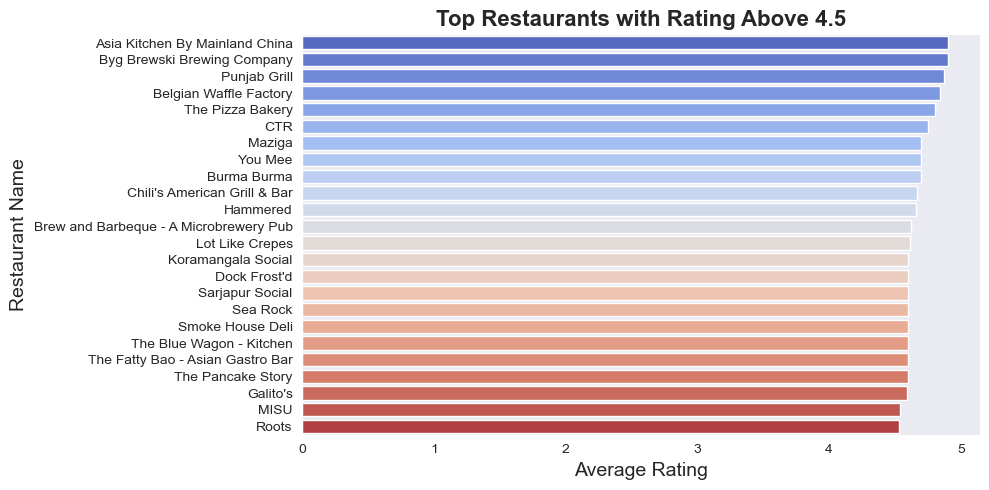

In [41]:
top_rated_restro= best_rating_restro[best_rating_restro["rate"]>4.5].sort_values(by="rate" ,ascending=False).reset_index().drop("index" , axis=1)

# Plotting top-rated restaurants
plt.figure(figsize=(10, 5))
sns.barplot(
    y="name", x="rate", data=top_rated_restro, palette="coolwarm"
)

# Adding titles and labels
plt.title("Top Restaurants with Rating Above 4.5", fontsize=16, fontweight='bold')
plt.xlabel("Average Rating", fontsize=14)
plt.ylabel("Restaurant Name", fontsize=14)

# Show the plot
plt.tight_layout()
plt.show()

# **Lets Observe Pre-Booking Facilty on Zomato**

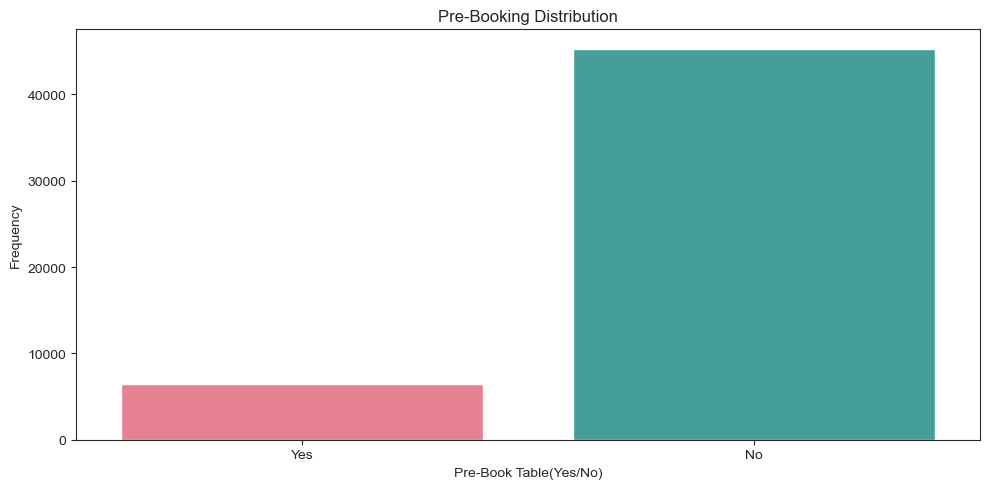

In [42]:
plt.figure(figsize=(10,5))
sns.set_style("ticks")
sns.countplot(x=df_copy["book_table"] , palette="husl")
plt.xlabel("Pre-Book Table(Yes/No)")
plt.ylabel("Frequency")
plt.title("Pre-Booking Distribution")
plt.tight_layout()
plt.show()

# **Lets check Top Restaurants with Pre-book Facility Available or not**

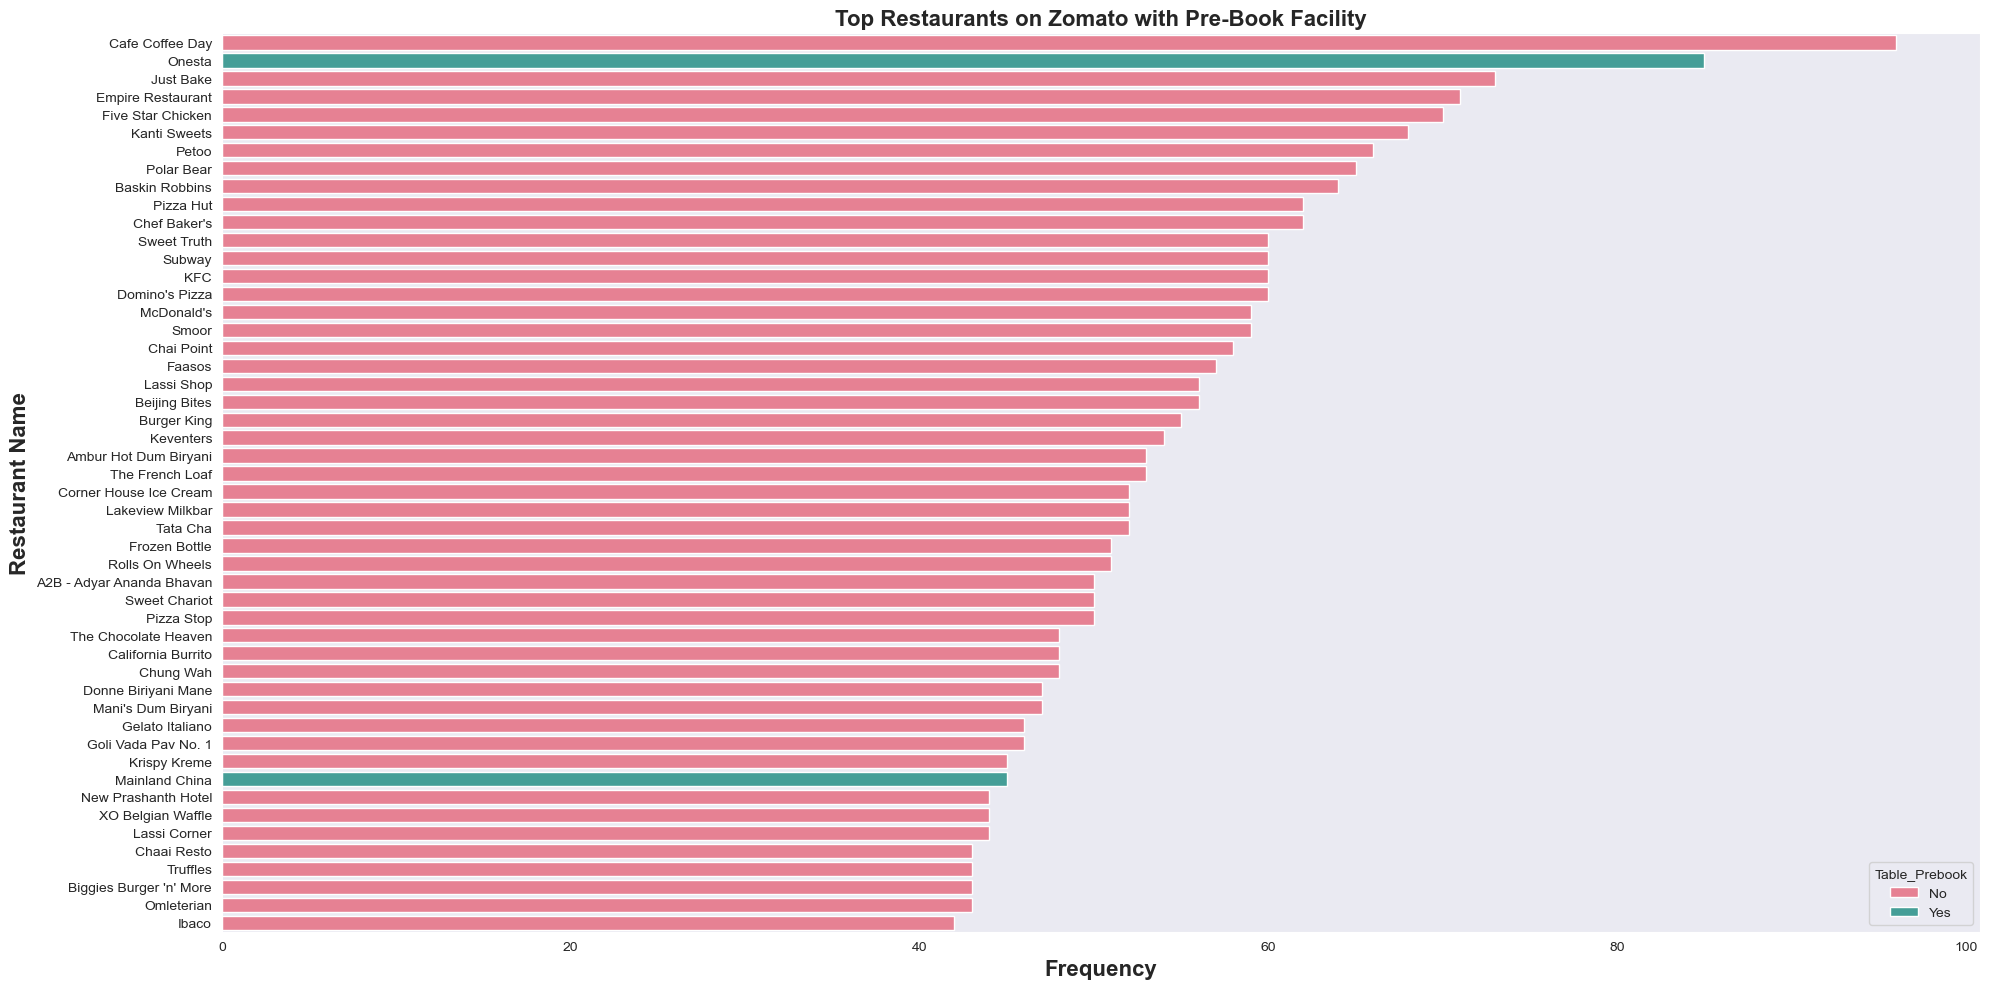

In [43]:
top_pre_book_restro_= df_copy[["name" ,"book_table"]].value_counts().sort_values(ascending=False).reset_index().head(50)
top_pre_book_restro_.columns=["Restaurant Name" , "Table_Prebook" , "Frequency"]
top_pre_book_restro_
plt.figure(figsize=(20,10))
sns.set_style("dark")
sns.barplot(data=top_pre_book_restro_ , x="Frequency" , y="Restaurant Name" , hue='Table_Prebook' , palette="husl")
plt.xlabel("Frequency" , fontsize=16 , fontweight="bold")
plt.ylabel("Restaurant Name" , fontsize=16 , fontweight="bold")
plt.title("Top Restaurants on Zomato with Pre-Book Facility" , fontsize=16 , fontweight="bold")
plt.tight_layout()
plt.show()

# **Lets observe cuisines with positive ratings and their respective percentage scores**

In [44]:
cuisines_rating= df_copy.groupby("cuisines")["rate"].mean().sort_values(ascending=False).reset_index()
cuisines_rating["Positive Rating"]= cuisines_rating["rate"] /5 *100
cuisines_rating.columns=["Restaurant name" , "Rating" , "Positive Rating Percentage"]
cuisines_rating

,Restaurant name,Rating,Positive Rating Percentage
0,"Continental, North Indian, Italian, South Indi...",4.90,98.0
1,"Healthy Food, Salad, Mediterranean",4.90,98.0
2,"Asian, Chinese, Thai, Momos",4.90,98.0
3,"Asian, Mediterranean, North Indian, BBQ",4.80,96.0
4,"North Indian, European, Mediterranean, BBQ",4.80,96.0
...,...,...,...
2718,"North Indian, Chinese, Fast Food, Rolls, Juices",2.50,50.0
2719,"North Indian, Chinese, Arabian, Biryani, Fast ...",2.45,49.0
2720,"Fast Food, Street Food, North Indian, Biryani",2.40,48.0
2721,"Chinese, European",2.40,48.0


# **Lets Identify Outtliers from Our Numericals feature  such as approx_cost**

In [45]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,[Masala Dosa],"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","North Indian, Rajasthani",600.0,Banashankari


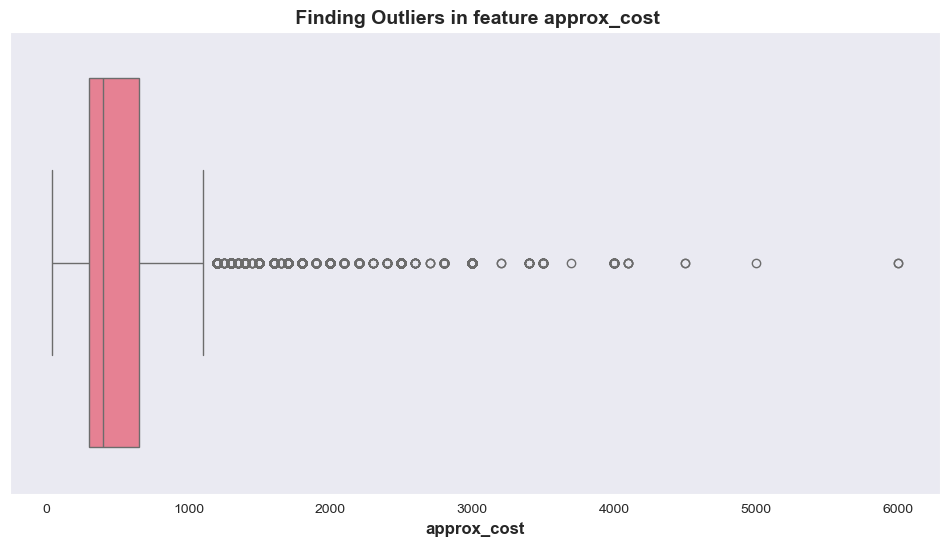

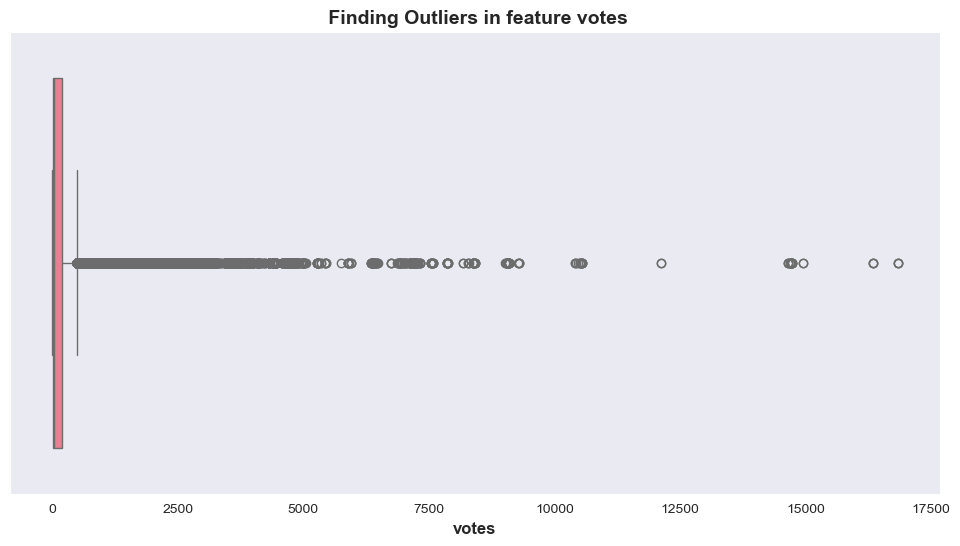

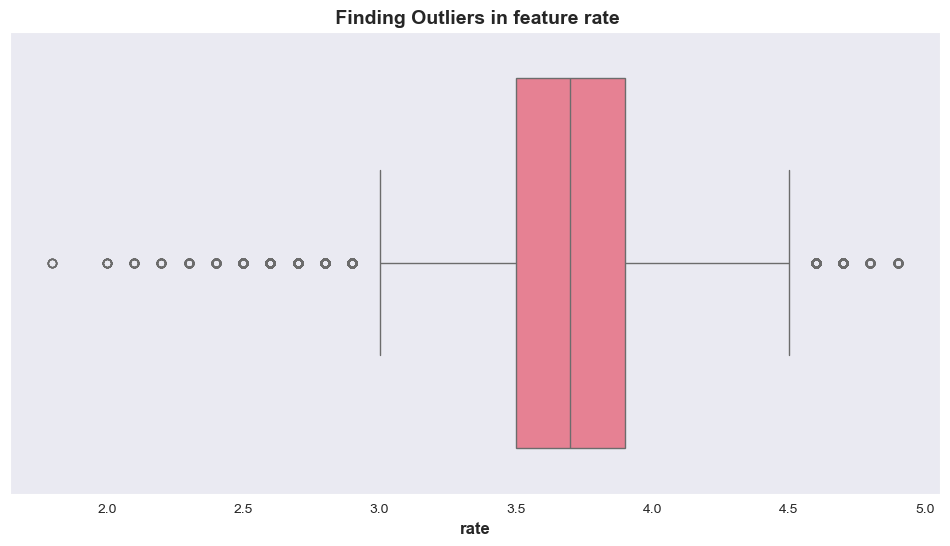

In [46]:
columns = ["approx_cost" , "votes" , "rate"]
for column in columns:
     plt.figure(figsize=(12,6))
     sns.set_style("dark")
     sns.boxplot(x=df_copy[column] , palette="husl" , flierprops=dict(marker='o', color='red', markersize=6))
     plt.xlabel(column , fontsize=12 , fontweight="bold")
     plt.title(f' Finding Outliers in feature {column}' , fontsize=14, fontweight="bold")

# **Lets replace Outliers with lower and higher limit**



In [47]:

def outliers_threshold(data, columns):
    """ 
    =========================================================================================
    This function replaces outliers with lower and higher bounds for provided features/columns.
    
    data: pd.DataFrame
        The dataframe containing the features/columns.
    
    columns: list of str
        List of column names (features) in which outliers need to be handled.
    
    Returns:
    --------
    lower_limits: dict
        Dictionary containing the lower limit for each column.
    
    higher_limits: dict
        Dictionary containing the higher limit for each column.
    ===========================================================================================
    """
    
    # Initialize dictionaries to store the limits for each column
    lower_limits = {}
    higher_limits = {}
    
    # Ensure the provided columns exist in the dataframe
    missing_columns = [col for col in columns if col not in data.columns]
    if missing_columns:
        raise ValueError(f"Columns not found in the dataframe: {', '.join(missing_columns)}")
    
    # Ensure all columns contain numeric data
    for column in columns:
        if not pd.api.types.is_numeric_dtype(data[column]):
            raise ValueError(f"Column '{column}' is not numeric. Please provide numeric columns.")
    
    # Loop through the columns to calculate IQR and handle outliers
    for column in columns:
        Q1 = data[column].quantile(0.25)
        Q3 = data[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Calculate lower and higher bounds
        lower_limit = Q1 - 1.5 * IQR
        higher_limit = Q3 + 1.5 * IQR
        
        # Store the limits for later use
        lower_limits[column] = lower_limit
        higher_limits[column] = higher_limit
        
        # Handle outliers by replacing them with the respective limits
        data[column] = np.where(data[column] < lower_limit, lower_limit, data[column])
        data[column] = np.where(data[column] > higher_limit, higher_limit, data[column])
    
    # Return the lower and higher bounds for each column
    return lower_limits, higher_limits


In [48]:

lower_limit , higher_limit = outliers_threshold(df_copy , columns)

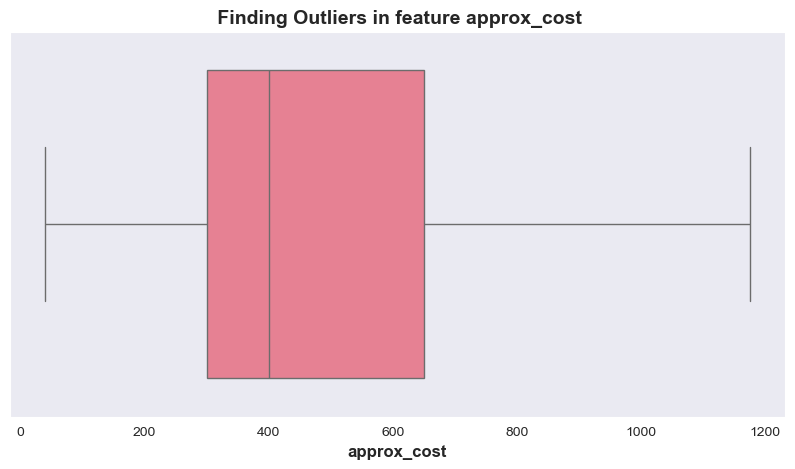

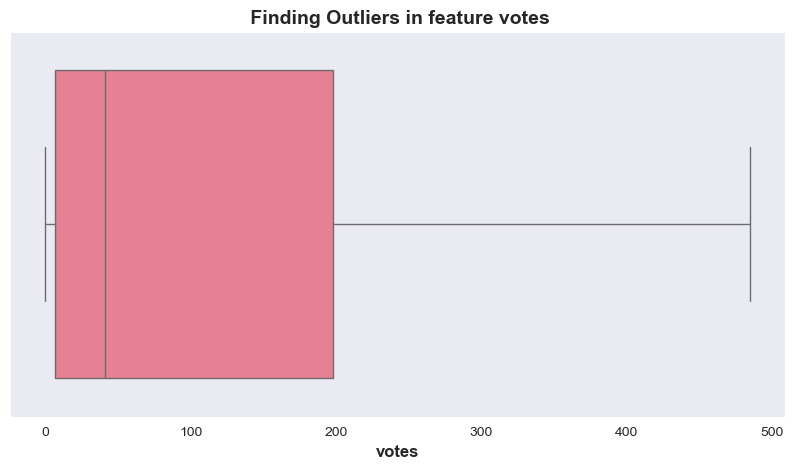

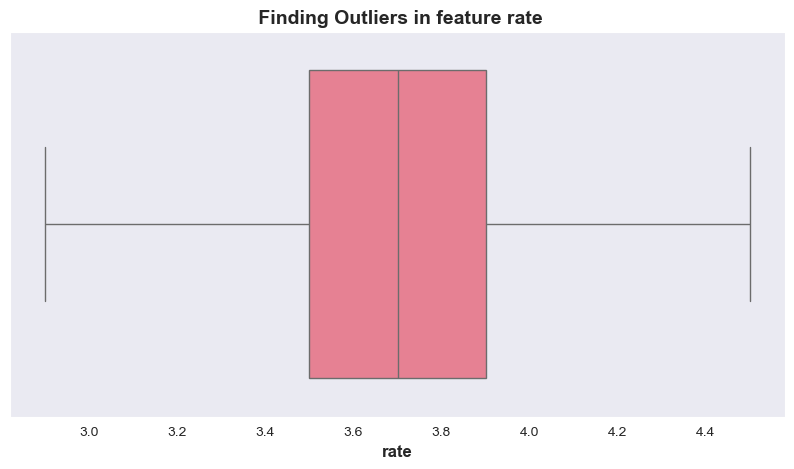

In [49]:
for column in columns:
     plt.figure(figsize=(10,5))
     sns.set_style("dark")
     sns.boxplot(x=df_copy[column] , palette="husl" , flierprops=dict(marker='o', color='red', markersize=6))
     plt.xlabel(column , fontsize=12 , fontweight="bold")
     plt.title(f' Finding Outliers in feature {column}' , fontsize=14, fontweight="bold")

# **Outliers are cleaned**

# **Data Tranformation**

In [50]:
df_copy.head()

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost,listed_in(city)
0,Jalsa,Yes,Yes,4.1,484.5,Banashankari,Casual Dining,"[Pasta, Lunch Buffet, Masala Papad, Paneer Laj...","North Indian, Mughlai, Chinese",800.0,Banashankari
1,Spice Elephant,Yes,No,4.1,484.5,Banashankari,Casual Dining,"[Momos, Lunch Buffet, Chocolate Nirvana, Thai ...","Chinese, North Indian, Thai",800.0,Banashankari
2,San Churro Cafe,Yes,No,3.8,484.5,Banashankari,"Cafe, Casual Dining","[Churros, Cannelloni, Minestrone Soup, Hot Cho...","Cafe, Mexican, Italian",800.0,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88.0,Banashankari,Quick Bites,[Masala Dosa],"South Indian, North Indian",300.0,Banashankari
4,Grand Village,No,No,3.8,166.0,Basavanagudi,Casual Dining,"[Panipuri, Gol Gappe]","North Indian, Rajasthani",600.0,Banashankari


# **Features Selection for Training**

In [51]:
df_train = df_copy.drop(["dish_liked" , "listed_in(city)" , "name"] , axis=1)
df_train.to_csv("dataset/cleaned_zomato.csv" , index=False)  #saving cleaned data
nominal_features = ["location"  ,"cuisines" , "rest_type"]
ordinal_features = [ "online_order" , "book_table"]

# **Cleaning Feature cuisines  and Converting it into Numericals**

In [52]:
df_train.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'approx_cost'],
      dtype='object')

In [53]:
df_train.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost
0,Yes,Yes,4.1,484.5,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0
1,Yes,No,4.1,484.5,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0
2,Yes,No,3.8,484.5,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0
3,No,No,3.7,88.0,Banashankari,Quick Bites,"South Indian, North Indian",300.0
4,No,No,3.8,166.0,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0


In [54]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder , OrdinalEncoder
one_hot = OneHotEncoder(sparse_output=False , drop="first")

# **Applying OneHotEncoder**

In [55]:
encoded_feature= one_hot.fit_transform(df_train[nominal_features])
df_encoded = pd.DataFrame(encoded_feature , columns=one_hot.get_feature_names_out())
df_encoded=df_encoded.astype(int)
df_train= pd.concat([df_train , df_encoded] , axis=1)
df_train.drop(nominal_features , axis=1 , inplace=True)
df_train.head()

,online_order,book_table,rate,votes,approx_cost,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,...,"rest_type_Quick Bites, Food Court","rest_type_Quick Bites, Kiosk","rest_type_Quick Bites, Meat Shop","rest_type_Quick Bites, Mess","rest_type_Quick Bites, Sweet Shop",rest_type_Sweet Shop,"rest_type_Sweet Shop, Dessert Parlor","rest_type_Sweet Shop, Quick Bites",rest_type_Takeaway,"rest_type_Takeaway, Delivery"
0,Yes,Yes,4.1,484.5,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Yes,No,4.1,484.5,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Yes,No,3.8,484.5,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,No,No,3.7,88.0,300.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,No,No,3.8,166.0,600.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# **Applying Ordinal Encoding**

In [56]:
def apply_ordinal_encoder(data: pd.DataFrame, columns: list) -> pd.DataFrame:
    """
    Apply Ordinal encoding to specified columns in a DataFrame.

    Parameters:
        data (pd.DataFrame): The DataFrame containing the data.
        columns (list): A list of column names to encode.

    Returns:
        pd.DataFrame: The DataFrame with Ordinal-encoded columns.
    """
    encoder = OrdinalEncoder()
    for column in columns:
        if data[column].isnull().any():
            print(f"Warning: Missing values found in column '{column}'. Filling with 'Unknown'.")
            data[column] = data[column].fillna('Unknown')
        data[column] = encoder.fit_transform(data[[column]])
    return data

In [57]:
df_train= apply_ordinal_encoder(df_train , ordinal_features)

In [58]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

def evaluate_regression_models(data, target_column, models, test_size=0.2, random_state=42):
    """
    Train and evaluate multiple regression models on a dataset and return metrics.

    Parameters:
        data (pd.DataFrame): The input dataset containing features and the target.
        target_column (str): The name of the target column.
        models (dict): A dictionary of regression models to evaluate, e.g., {'Linear Regression': model}.
        test_size (float): The proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.

    Returns:
        pd.DataFrame: A DataFrame summarizing the performance metrics of each model.
        y_test : y true/test value after applyin train_test split in  a form of array
        y_pred : target predicted values in a form of array
        residuals : y_true - y_predicted values 
    """
    # Splitting the data
    X = data.drop(columns=[target_column])
    y = data[target_column]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    results = []  # To store metrics for each model
    
    # Iterate through each model
    for name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Make predictions
        y_pred = model.predict(X_test)
        residuals = y_test - y_pred
        # Calculate metrics
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        
        
        # Append results
        results.append({
            'Model': name,
            'MAE': mae,
            'MSE': mse,
            'RMSE': rmse,
            'R² Score': r2
        })
    
    # Convert results to DataFrame
    results_df = pd.DataFrame(results)
    return results_df 


# **Model Training**

In [59]:
df_train

,online_order,book_table,rate,votes,approx_cost,location_Banashankari,location_Banaswadi,location_Bannerghatta Road,location_Basavanagudi,location_Basaveshwara Nagar,...,"rest_type_Quick Bites, Food Court","rest_type_Quick Bites, Kiosk","rest_type_Quick Bites, Meat Shop","rest_type_Quick Bites, Mess","rest_type_Quick Bites, Sweet Shop",rest_type_Sweet Shop,"rest_type_Sweet Shop, Dessert Parlor","rest_type_Sweet Shop, Quick Bites",rest_type_Takeaway,"rest_type_Takeaway, Delivery"
0,1.0,1.0,4.1,484.5,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1.0,0.0,4.1,484.5,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1.0,0.0,3.8,484.5,800.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0.0,0.0,3.7,88.0,300.0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.0,0.0,3.8,166.0,600.0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51712,0.0,0.0,3.6,27.0,1175.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51713,0.0,0.0,3.7,0.0,600.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51714,0.0,0.0,3.7,0.0,1175.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
51715,0.0,1.0,4.3,236.0,1175.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
from sklearn.linear_model import LinearRegression , Lasso , Ridge , ElasticNet
from sklearn.ensemble import RandomForestRegressor  , GradientBoostingRegressor , AdaBoostRegressor , BaggingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor


# Models to test
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Elastic_Net' : ElasticNet() ,
    'Lasso' : Lasso() ,
    'XGBoost Regressor' : XGBRegressor() ,
    'Bagging_Regressor' : BaggingRegressor() ,
    
}
result_df = evaluate_regression_models(data=df_train , target_column="rate" , models=models , test_size=0.3 , random_state=42)

In [61]:
pd.options.display.float_format = '{:.6f}'.format #Removing Scientific Notation 
result_df

,Model,MAE,MSE,RMSE,R² Score
0,Linear Regression,3900811.155207,21174020360690220.000000,145512955.989115,-153060093279845504.000000
1,Random Forest,0.038902,0.009874,0.099366,0.928627
2,Decision Tree,0.028344,0.013138,0.114620,0.905031
3,Elastic_Net,0.233301,0.090564,0.300939,0.345342
4,Lasso,0.233159,0.090590,0.300981,0.345158
5,XGBoost Regressor,0.147089,0.045509,0.213329,0.671028
6,Bagging_Regressor,0.041267,0.011254,0.106087,0.918646


# **Checking if there is an Overfitting or  Underfitting**

In [62]:
from sklearn.model_selection import RandomizedSearchCV ,train_test_split
from xgboost import  XGBRegressor 
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score

X= df_train.drop("rate" , axis=1)
y= df_train["rate"]

X_train ,X_test , y_train , y_test=train_test_split(X,y , test_size=0.3 , random_state=42)

model=RandomForestRegressor(max_depth=50 , random_state=42)
model.fit(X_train , y_train )
train_pred = model.predict(X_train)
y_pred= model.predict(X_test)
print(f'MAE: {mean_absolute_error(y_test , y_pred)}')
print(f'MSE: {mean_squared_error(y_test , y_pred)}')
print(f'Train Prediction {r2_score(y_train , train_pred)}')
print(f'Test Prediction {r2_score(y_test , y_pred)}')


MAE: 0.06288337347393166
MSE: 0.014486303902968543
Train Prediction 0.953883985246906
Test Prediction 0.8952832296891077


In [63]:
from sklearn.ensemble import ExtraTreesRegressor
extra_tree = ExtraTreesRegressor()
extra_tree.fit(X,y)

ExtraTreesRegressor()

# **Important Features**

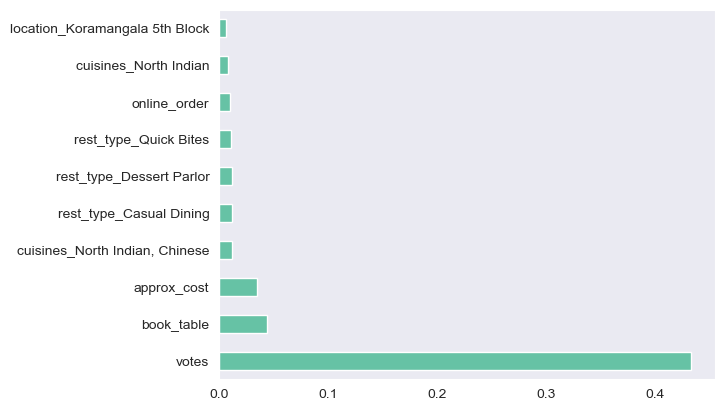

In [64]:
# Plotting graph of feature importances
important_feature = pd.Series(extra_tree.feature_importances_, index=X.columns)
important_feature.nlargest(10).plot(kind='barh')
plt.show()

In [65]:
def plot_residuals_and_predictions(model, X_test, y_test, model_name):
    """
    Plot residuals and true vs predicted values for a regression model.

    Parameters:
        model: The trained regression model.
        X_test (pd.DataFrame or np.array): The test features.
        y_test (pd.Series or np.array): The true target values.
        model_name (str): The name of the model being evaluated.

    Returns:
        None: Displays the plots.
    """
    # Get predictions
    y_pred = model.predict(X_test)
    residuals = y_test - y_pred

    # Create subplots
    plt.figure(figsize=(12, 6))

    # Residuals plot
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, residuals, color='skyblue', edgecolor='black')
    plt.axhline(0, color='red', linestyle='--', linewidth=1)
    plt.title(f'Residuals Plot for {model_name}')
    plt.xlabel('True Values')
    plt.ylabel('Residuals')
    plt.grid(True)

    # True vs Predicted plot
    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred, color='green', edgecolor='black')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=1)
    plt.title(f'True vs Predicted for {model_name}')
    plt.xlabel('True Values')
    plt.ylabel('Predicted Values')
    plt.grid(True)

    # Show plots
    plt.tight_layout()
    plt.show()


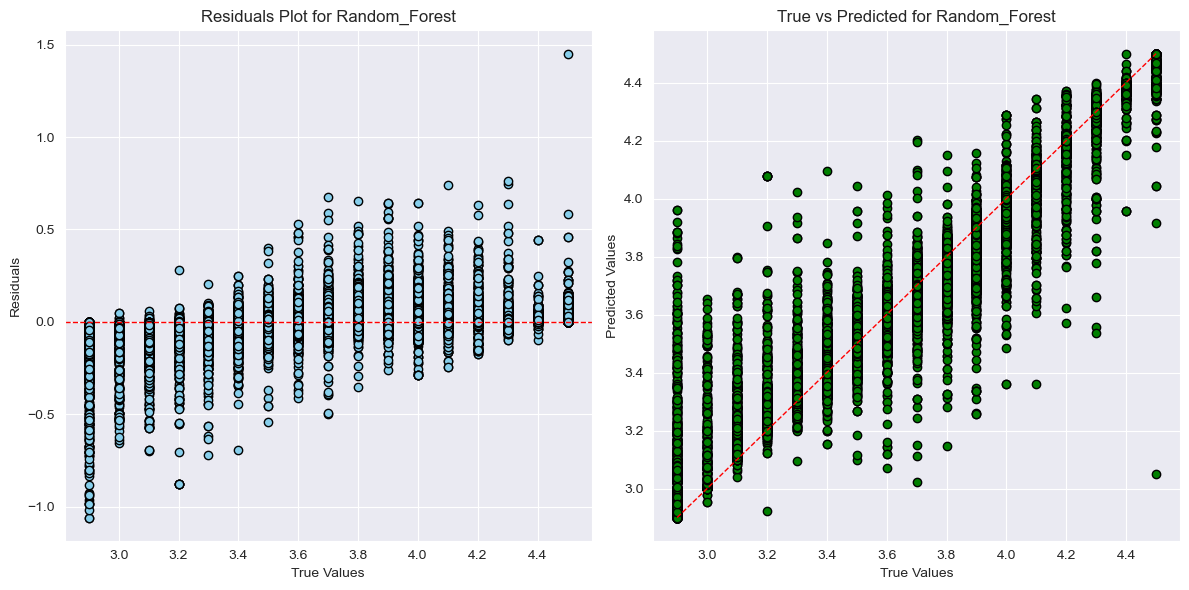

In [66]:
plot_residuals_and_predictions(model , X_test , y_test , model_name="Random_Forest")